In [1]:
import datetime
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
import matplotlib.pyplot as plt
from sympy import symbols, diff, solve, integrate, dsolve
from sympy.utilities.lambdify import lambdify
from sympy.solvers.solveset import linsolve
import warnings
warnings.filterwarnings("ignore")

The following notebook is a review of differential and difference equations with examples in python.

The equations and examples are from the following book I highly recommend using to brush up on mathamtics commonly used in economics coursework:
- Dowling, E. T. (2012). Introduction to mathematical economics. McGraw-Hill.
    - [Amazon link](https://www.amazon.com/Schaums-Introduction-Mathematical-Economics-Outlines/dp/0071762515/ref=sr_1_7?dchild=1&keywords=mathematics+economics&qid=1593200726&sr=8-7)

# Table of contents
- [1. First-order equations](#First-order-equations)
    - [1.1 Differential equations](#1.1-Differential-equations)
    - [1.2 Difference equations](#1.2-Difference-equations)
    
    
- [2. Second-order equations](#2.-Second-order-equations)
     - [2.1 Differential equations](#2.1-Differential-equations)
     - [2.2 Difference equations](#2.2-Difference-equations)



- [3. Simultaneous equations](#3.-Simultaneous-equations)
    - [3.1 Differential equations](#3.1-Differential-equations)
    - [3.2 Difference equations](#3.2-Difference-equations)


- [4. Calculus of variations](#4.-Calculus-of-variations)


- [5. Optimal control theory](#5.-Optimal-control-theory)


# Intro
## I.1 Differential equations

- `Differential equation:` is an equation that relates one or more functions and their derivatives.

Definition from: [wikipedia](https://en.wikipedia.org/wiki/Differential_equation#:~:text=In%20mathematics%2C%20a%20differential%20equation,a%20relationship%20between%20the%20two.)


## I.2 Difference equations
- `Difference equation:` an equation that recursively defines a sequence or multidimensional array of values if one or more initial terms are given 
    - each further term of the sequence or array is defined as a function of the preceding terms.
-   A difference equation is a specific type of recurrence relation

Definition from: [wikipedia](https://en.wikipedia.org/wiki/Recurrence_relation#Relationship_to_difference_equations_narrowly_defined)

## I.3 Linear difference equation
- `Linear difference equation:` 
-  A polynomial that is linear 
    - Means that each of its terms has degree 0 or 1. 
- Usually the context is the evolution of some variable over time, with the current time period or discrete moment in time denoted as t, one period earlier denoted as t − 1, one period later as t + 1

- Used in modeling such time series
- In econometric applications, linear difference equations are modeled with stochastic terms
    - Examples include: AR, VAR, ARMA
    
Definition from: [wikipedia](hhttps://en.wikipedia.org/wiki/Linear_difference_equation)


# 1. First-order equations

## 1.1 Differential equations

In [2]:
y_dt, y = symbols('y_dt y', integer=True)
def differential(f):
    #Steady state solutions
    ss = solve(f, y)
    
    #Critical point
    critical = solve(diff(f,y))
    
    #Check for concavity
    if diff(f,y,y)<0:
        print("Concave with max")
    else:
        print("Not concave")
    
    #Plot
    x = np.linspace(-1,5,101)
    f_lamb = lambdify(y, f)
    yf = f_lamb(x)
    plt.plot(x,yf)
    plt.axvline(critical, color='red', label='Critical point')
    plt.axvline(ss[0], color='green', label='Steady state')
    plt.axvline(ss[1], color='green', label='Steady state')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.05),fancybox=True, shadow=True, ncol=3)
    
    
    print('If dy*/dy>0 arrow points right ')
    arrow_args = dict(fc="k", ec="k", head_width=.6, lw=1,
            alpha=0.6, head_length=.4)
    
    plt.arrow(ss[0],0, -.5, 0, **arrow_args) # x, y, dx, dy
    plt.arrow(ss[0],0, .5, 0, **arrow_args) # x, y, dx, dy

    plt.arrow(ss[1]+1, 0, -.5, 0, **arrow_args) # x, y, dx, dy
    plt.arrow(ss[1]-1, 0, .5, 0, **arrow_args) # x, y, dx, dy  

### 1.1.1 Python example: Differential equations and phase diagrams
$$Y=8y-2y^2$$

Concave with max
If dy*/dy>0 arrow points right 


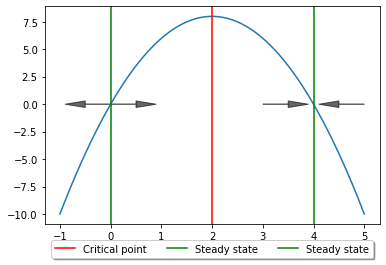

In [3]:
f = 8*y - 2*y**2
differential(f)  

## 1.2 Difference equations

#### Basic definition
- Relationship between dependent variable and a lagged variable changing at discrete intervals of time



### 1.2.1 General formula

$$y_t = b y_{t+1}+a \\
\begin{cases}
y_t = (y_0-\frac{a}{1-b})b^t+ \frac{a}{1-b} & \text{when} \neq 1\\
y_t = y_0+at & \text{when} = 1
\end{cases}    
$$

When:
- b>0: non-osscilating
- b<0: osccilating
- |b|>1: explodes
- |b|<0: converges


#### 1.2.1.1 Python example: FOD-General formula

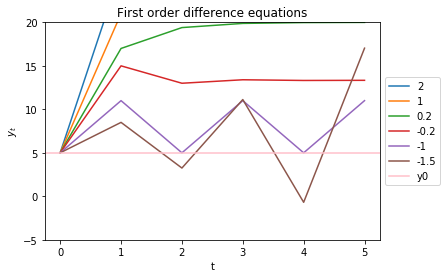

In [4]:
def first_difference(y0, b, a, length):
    yt = []
    for t in range(0, length+1):
        if b!=1:
            yt.append((y0-((a)/(1-b)))*(b)**t + (a/(1-b)))
        else:
            yt.append(y0+a*t)
    return yt
y0, a, length = [5,16,5]
b = [2, 1, .2, -.2, -1, -1.5]
for bs in b:
    yt = first_difference(y0, bs, a, length)     
    t = np.arange(0,length+1, 1)
    plt.plot(t, yt, label = bs)
    plt.ylim([-5,20])
plt.axhline(y0,color='pink',label ='y0')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel(r'$y_t$')
plt.xlabel("t")
plt.title('First order difference equations');

### 1.2.2 Economic example: First-order-difference
- Reference: User create code derived from [Quantecon](https://python-programming.quantecon.org/python_oop.html)

 $$k_{t+1} = \frac{[(s z k^α_t) + (1 - δ)k_t]}{(1 + n)}$$
 - s: Savings
 - n: Depreciation rate
 - $\alpha_t$: Labor share in period t
 - z: Productivity
 - $\delta$: Depreciation rate
 - $k_t$: Capital stock in period t

#### 1.2.2.1 Solow steady state

In [5]:
def solow(n, s, δ, α, z, kt_0, ts_len):
    k = np.zeros([ts_len])
    k[0] = kt_0
    for t in range(ts_len-1):
        k[t+1] = (s * z * k[t]**α + (1 - δ) * k[t]) / (1 + n)
    return k

In [6]:
def solow_ss(n, s, δ, α, z):
    return ((s * z) / (n + δ))**(1 / (1 - α))

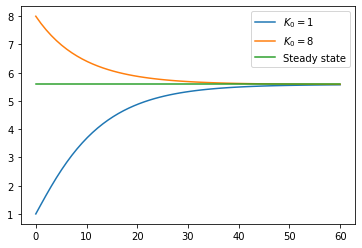

In [7]:
n, s, δ, α, z, kt_0, ts = [.05, 0.25, .1, .3, 2, 1, 60]
for k in [1,8]:
    capital_path = solow(n, s, δ, α, z, k, ts)
    time_path = np.linspace(0,ts,ts)
    plt.plot(time_path, capital_path, label=r'$K_0={}$'.format(k))
plt.plot(time_path, np.repeat(solow_ss(n,s,δ, α, z), len(time_path)), label='Steady state')
plt.legend();

# 2. Second-order equations

## 2.1 Differential equations
$$y\prime\prime(t) + b1 y\prime(t)+b2 y(t)=a$$

### 2.1.1 Sympy example

In [8]:
import sympy as sp

t = sp.symbols('t')
y = sp.Function('y')
diffeq = sp.Eq(y(t).diff(t, t) + y(t).diff(t, t,t)+ y(t)) 
diffeq

Eq(y(t) + Derivative(y(t), (t, 2)) + Derivative(y(t), (t, 3)), 0)

### 2.1.2 Python example: second-order differential equation


Example:
$$y\prime\prime(t) - 5 y\prime(t)+4 y(t)=2$$

In [9]:
k1, k2, e,t = symbols('k1 k2 e t', integer=True)

def second_differential(b1, b2, a, y, dy):
    #Particular equation:
    if b2!=0:
        particular_integral = a/b2
    if b2 == 0 or b1 !=0:
        particular_integral = (a/b1)*t
    if b1==0 or b2==0:
        particular_integral = (a/2)*t**2
    
    #Eigenvalues
    r1 = (-b1+(np.sqrt(b1**2-4*b2)))/2      
    r2 = (-b1- (np.sqrt(b1**2-4*b2)))/2

    
    #Complementary solution    
    comp_solu = k1*e**(r2*t)    +   k2*e**(r1*t) + particular_integral
    comp_solu_deriv = diff(comp_solu, t)
    
    #UNFINISHED
    #Definite solution
    def_solu1 = comp_solu-y
    def_solu2 = comp_solu_deriv-dy
    #def_solu = linsolve([def_solu1, def_solu2],(k1,k2))
    
    return comp_solu

In [10]:
second_differential(-5, 4, 2, 5.5, 11)

e**(1.0*t)*k1 + e**(4.0*t)*k2 - 0.4*t

## 2.2 Difference equations
#### Basic definition
- Specifies the state $x_t$ as a function of the state at two previous times


$$y_t+b1y_{t-1}+ b2y_{t-2}=a$$

### 2.2.1 Particular solution

In [11]:
k1, k2, e, t, y = symbols('k1 k2 e t y', integer=True)
def second_difference(b1, b2,a):
    #Particular equation:
    if b2+b1!=-1:
        particular_solu = (a)/(1+b1+b2)
    if b2+b1 == -1 and b1 !=-2:
        particular_solu = ((a)/(2+b1))*t
    if b2+b1==-1 and b1==-2:
        particular_solu = (a/2)*t**2
        
    return particular_solu

#### 2.2.1.1 Ex1: Particular solution

$$y_t-10y_{t-1}+ 16y_{t-2}=14$$

In [12]:
b1,b2,a = [-10,16, 14]
second_difference(b1,b2,a)

2.0

#### 2.2.1.2 Ex2: Particular solution

$$y_t-6y_{t-1}+ 5y_{t-2}=12$$

In [13]:
second_difference(-6, 5, 12)

-3.0*t

$$y_t-2y_{t-1}+ y_{t-2}=8$$

In [14]:
second_difference(-2, 1, 8)

4.0*t**2

### 2.2.2 Complementary function

In [15]:
A1, A2, e, t, y = symbols('A1 A2 e t y', integer=True)
def second_difference(b1, b2,a):
    #Particular equation:
    if b2+b1!=-1:
        particular_solu = (a)/(1+b1+b2)
    if b2+b1 == -1 and b1 !=-2:
        particular_solu = ((a)/(2+b1))*t
    if b2+b1==-1 and b1==-2:
        particular_solu = (a/2)*t**2
        
    #Eigenvalues
    eigvalues = np.sort((-b1+np.array([+1,-1])*(np.sqrt(b1**2-4*b2)))/2)
    
    #Complementary function
    comp_func = A1*eigvalues[0]**t+A2*eigvalues[1]**t+particular_solu
    return comp_func

#### 2.2.2.1 Ex1: Particular solution

$$y_t-10y_{t-1}+ 16y_{t-2}=14$$

In [16]:
second_difference(-10,16, 14)

2.0**t*A1 + 8.0**t*A2 + 2.0

#### 2.2.2.2 Ex2: Particular solution

$$y_t-6y_{t-1}+ 5y_{t-2}=12$$

In [17]:
second_difference(-6, 5, 12)

1.0**t*A1 + 5.0**t*A2 - 3.0*t

### 2.2.3 General solution

In [18]:
A1, A2, e, t, y = symbols('A1 A2 e t y', integer=True)
def second_difference(b1, b2,a, y0, y1):
    #Particular equation:
    if b2+b1!=-1:
        particular_solu = (a)/(1+b1+b2)
    if b2+b1 == -1 and b1 !=-2:
        particular_solu = ((a)/(2+b1))*t
    if b2+b1==-1 and b1==-2:
        particular_solu = (a/2)*t**2
        
    #Eigenvalues
    eigvalues = np.sort((-b1+np.array([+1,-1])*(np.sqrt(b1**2-4*b2)))/2)
    
    #Complementary function
    comp_func = A1*eigvalues[0]**t+A2*eigvalues[1]**t+particular_solu
    
    #General solution
    general_solu_1 =  comp_func.subs({t:0})-y0
    general_solu_2 =  comp_func.subs({t:1})-y1
    general_solu = list(linsolve([general_solu_1, general_solu_2],(A1,A2)))[0]
    final_answer = general_solu[0]*eigvalues[0]**t+general_solu[1]*eigvalues[1]**t+particular_solu
    
    #Check answer by plugging t into equation to find y0
    #Should be equal
    assert final_answer.subs({t:0})==y0
    assert final_answer.subs({t:1})==y1
    
    #Stability conditions
    if abs(max(eigvalues))>1:
        print('Time path diverges')
    else:
        print('Time path converges')
    
    return final_answer

second_difference(-10,16, 14, 10, 36)

Time path diverges


5.0*2.0**t + 3.0*8.0**t + 2.0

## 2.3 Economic example: Second-order difference
- Reference: User create code derived from [Quantecon](https://python-programming.quantecon.org/python_oop.html)

###  2.3.1 The Samuelson Multiplier-Accelerator

##### Consumption function
$$
C_t = a Y_{t-1} + \gamma \tag{1}
$$

Where:
- a: Marginal propensity to consume (MPC)

##### Investment function
$$
I_t = b (Y_{t-1} - Y_{t-2}) \tag{2}
$$

Where:
- b: Accelerator coefficient

##### GDP identity
$$
Y_t = C_t + I_t + G_t \tag{3}
$$

##### Second-order linear difference equation: Combine 1, 2, 3  

$$
Y_{t+2} - \rho_1 Y_{t+1} - \rho_2 Y_t  = 0 \tag{6}
$$
Where:
- $ \rho_1 = (a+b) $ 
- $ \rho_2 = -b $.




#### 2.3.1.1 Python example: Samuelson Multiplier-Accelerator

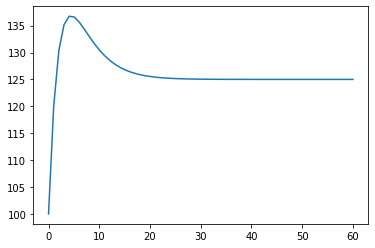

In [19]:
def sam(y_0=100, y_1=80, α=.92, β=.5, γ=10, time_series=60): 
    #Path
    ρ1 = α + β
    ρ2 = -β  
    y = np.zeros([time_series])
    y[0] = y_0
    y[1] = y_1
    for t in range(time_series-2):
        y[t+2] = ρ1 * y[t+1] + ρ2 * y[t] + γ 
    plt.plot(np.linspace(0,time_series,time_series), y)
sam(y_0=100, y_1=120, α=.92, β=.5, γ=10, time_series=60)

#### 2.3.1.2 Python example: Stabilty conditions--Samuelson Multiplier-Accelerator

In [20]:
def sam_stability(α=.92, β=.5):
    roots = []
    ρ1 = α + β
    ρ2 = -β  
    print(f'ρ_1 is {ρ1}')
    print(f'ρ_2 is {ρ2}')
    discriminant = ρ1 ** 2 + 4 * ρ2
    roots.append((-ρ1 + np.sqrt(discriminant)) / 2)
    roots.append((-ρ1 - np.sqrt(discriminant)) / 2)
    if ρ2 > 1 + ρ1 or ρ2 < -1:
        print('Explosive oscillations')
    elif ρ1 + ρ2 > 1:
        print('Explosive growth')
    elif discriminant < 0:
        print('Complex roots\nModulus less than one\nTherefore damped oscillations')
    else:
        print('Roots real \nAbsolute values are less than one \nTherefore smooth convergence to a steady state')

In [21]:
sam_stability(α=.92, β=.5)

ρ_1 is 1.42
ρ_2 is -0.5
Roots real 
Absolute values are less than one 
Therefore smooth convergence to a steady state


# 3. Simultaneous equations

## 3.1 Differential equations



$$
\dot{y_1} = a_{11}y_1 + a_{12}y_2+b_1 \\
\dot{y_2} = a_{21}y_1 + a_{22}y_2+b_2
$$

#### Expressed in matrix form
$$
\begin{bmatrix}
\dot{y_1}\\
\dot{y_2}
\end{bmatrix} 
=
\begin{bmatrix}
a_{11} & a_{12}\\
a_{21} & a_{22}
\end{bmatrix} 
\begin{bmatrix}
y_1\\
y_2
\end{bmatrix} +
\begin{bmatrix}
b_1\\
b_2
\end{bmatrix} 
$$

#### Complementary solution
$$y_c = \sum_{i=1}^{n} k_i C_i e^{r_i t}$$
Where:
- $C_i$ = Eigen vector
- $r_i$ = EIgenvalue

#### Calculate eigenvalues
$$r_i = \frac{Tr(A) \pm \sqrt{Tr(A)^2 - 4|A|}}{2}$$

#### Stability conditions
- all $r_i<0$ dynamically stable
- $r_i>0$ unstable

### 3.1.1 Python example: Differential equations

In [22]:
import numpy as np
from sympy import symbols, diff, solve
from sympy.solvers.solveset import linsolve

k1, k2, e,t = symbols('k1 k2 e t', integer=True)

def simultaneous_differential(matrix, solu, ys):
    assert sum(np.diag(A))==np.trace(A)
    
    #Eigenvalues
    trace = np.trace(A)
    det = round(np.linalg.det(A),0)
    eig_values = np.round((np.sort((trace+np.array([+1,-1])*np.sqrt(trace**2-(4*det)))/2)),1)
    
    #Eigvenvectors
    eig_vecs = []
    for i in eig_values:
        vec = matrix-np.diag(np.repeat(i,2))
        c1 = 1 #Euclidean distance condition
        c2 = c1/((-vec[0,1])/vec[0,0])
        eigvector = np.array([c1,c2]).reshape(-1,1)
        eig_vecs.append(eigvector)
    eig_matrix = np.concatenate(eig_vecs, axis=1)
    
    #Complementary solution   
    comp_solus = []
    for i in range(np.shape(eig_matrix)[1]):
        y_complementary = eig_matrix[i,0]*k1*e**(eig_values[0]*t)+ eig_matrix[i,1]*k2*e**(eig_values[1]*t) 
        comp_solus.append(y_complementary) 
    
    #Complete general solution
    intertemporal_solu = np.linalg.solve(A,b)
    general_solus = []
    for solu, comp in zip(intertemporal_solu, comp_solus):
        general_solus.append(comp+solu)
    
    
   #Definite solution
    initial_conditions = []
    for idx, (y, solu) in enumerate(zip(ys,intertemporal_solu)):
        k = eig_matrix[idx,0]*k1+ eig_matrix[idx,1]*k2+solu-y
        initial_conditions.append(k) 
    ks = list(linsolve([initial_conditions[0], initial_conditions[1]],(k1,k2)))[0]
    
    definite_solu = []
    for ans,intertemp in zip(comp_solus,intertemporal_solu):
           definite_solu.append(ans.subs({k1:ks[0], k2:ks[1]})+intertemp)
    
    return eig_values, eig_matrix, comp_solus, general_solus, definite_solu

#### 3.1.1.1 Complementary solutions

In [23]:
A = np.array([[5,-.5],[-2,5]])
b = np.array([[12], [24]])
ys = [12,4]
simultaneous_differential(A, b, ys)[2][0]

1.0*e**(4.0*t)*k1 + 1.0*e**(6.0*t)*k2

In [24]:
simultaneous_differential(A, b, ys)[2][1]

2.0*e**(4.0*t)*k1 - 2.0*e**(6.0*t)*k2

#### 3.1.1.2 Complete general solutions

In [25]:
simultaneous_differential(A, b, ys)[3][0]

1.0*e**(4.0*t)*k1 + 1.0*e**(6.0*t)*k2 + 3.0

In [26]:
simultaneous_differential(A, b, ys)[3][1]

2.0*e**(4.0*t)*k1 - 2.0*e**(6.0*t)*k2 + 6.0

#### 3.1.1.3 Definite solutions

In [27]:
simultaneous_differential(A, b, ys)[4][0]

4.0*e**(4.0*t) + 5.0*e**(6.0*t) + 3.0

In [28]:
simultaneous_differential(A, b, ys)[4][1]

8.0*e**(4.0*t) - 10.0*e**(6.0*t) + 6.0

## 3.2 Difference equations

In [29]:
from sympy import symbols, diff, solve
from sympy.solvers.solveset import linsolve

k1, k2,t = symbols('k1 k2 t', integer=True)

def simultaneous_difference(matrix, solu, x0, y0):
    assert sum(np.diag(A))==np.trace(A)
    
    #Eigenvalues
    trace = np.trace(A)
    det = round(np.linalg.det(A),0)
    r1 = (trace + np.sqrt(trace**2-(4*det)))/2 #Eigenvalue finder
    r2 = (trace - np.sqrt(trace**2-(4*det)))/2 #Eigenvalue finder
    if abs(r1)>0 and abs(r2)>0:
        print('Time path is divergent')
    else:
        print("Time path is convergent")
    
    #Eigvenvectors
    # Eigenvector 1
    vec1 = matrix-np.diag(np.repeat(r1,2))
    c1 = 1 #Euclidean distance condition
    c2 = c1/((-vec1[1,1])/vec1[1,0])
    eigvector_1 = np.array([c1,c2]).reshape(-1,1)
    
    # Eigenvector 2
    vec2 = matrix-np.diag(np.repeat(r2,2))
    c1 = 1 #Euclidean distance condition
    c2 = c1/((-vec2[0,1])/vec2[0,0]) 
    eigvector_2 = np.array([c1,c2]).reshape(-1,1)
    
    
    #Complementary solution    
    eig_matrix = np.hstack([eigvector_1, eigvector_2])
    xt = k2*(eig_matrix[0,1])*r2**t    +   k1*eig_matrix[0,0]*r1**t 
    yt = k2*(eig_matrix[1,1])*r2**t    +   k1*eig_matrix[1,0]*r1**t
    
    #Complete general solution
    solu1, solu2 = np.linalg.inv(np.eye(2)-matrix)@solu
    y1_c = xt + solu1
    y2_c = yt + solu2
    
    
    return (r1, r2), eigvector_1, eigvector_2, xt, yt, y1_c, y2_c 

### 3.2.1 Simultaneous differential equations

- Pg. 434, 19.3

In [30]:
A = np.array([[-4, 1],[2,-3]])
b = np.array([[12], [6]])
x0, y0 = [16,8]
# General solutions
yt = simultaneous_difference(A, b, x0, y0)[6]
xt = simultaneous_difference(A, b, x0, y0)[5]

Time path is divergent
Time path is divergent


In [31]:
xt

1.0*(-2.0)**t*k1 + 1.0*(-5.0)**t*k2 + 3.0

In [32]:
yt

2.0*(-2.0)**t*k1 - 1.0*(-5.0)**t*k2 + 3.0

# 4. Calculus of variations

## 4.1 Basics
Dynamic optimization: 
- max or min of an integral

$$\int^T_0 F[t,x(t), x^*(t)]dt$$


## 4.2 Distance between two points

$$ s= \int^{t1}_{t0}=\sqrt{1+(\frac{dx}{dt})^2 dt}$$

## 4.3 Euler's equation

$$\int^{t1}_{t0} F[t,x(t), x^*(t)]dt$$

To optimize the above function the necessary condition is Euler's equation

$$\frac{\partial F}{\partial x} = \frac{d}{dt}\Big(\frac{\partial F}{\partial \dot{x}}\Big)$$

### 4.3.1 Sympy: Euler equation

In [33]:
t,x = sp.symbols('t, x')
xdot = sp.Function('x')
f = 6*x**2*e**(3*t)+4*t*(xdot(t))
f

6*e**(3*t)*x**2 + 4*t*x(t)

### 4.3.1.1 $\frac{\partial F}{\partial \dot{x}}$

In [34]:
df_dx_dot = diff(f, xdot(t))
df_dx_dot

4*t

### 4.3.1.2 $\frac{d}{dt}\Big(\frac{\partial F}{\partial \dot{x}}\Big)$

In [35]:
rhs = diff(df_dx_dot,t)
rhs

4

### 4.3.1.3 $\frac{\partial F}{\partial x}$

In [36]:
df_dx = diff(f,x)
df_dx 

12*e**(3*t)*x

### 4.3.1.4 Euler equation solution: $X(t)=$ 

In [37]:
solve(df_dx-rhs, x)

[e**(-3*t)/3]

## 4.5 Sufficiency conditions

$$D=\begin{bmatrix}
F_{xx}& F_{xx^*} \\
F_{x^*x}& F_{x^*x^*}
\end{bmatrix}$$

Where:
- $|D_1| = F_{xx}<0$
    - Stricly concave
    
- $|D_2| = |D|>0$
    - Global max
  

## 4.6 Dynamic optimization s.j.t constraints

$$\int^T_0 F[t,x(t), \dot{x}(t)]dt\\
s.j.t\\
\int^T_0 G[t,x(t), \dot{x}(t)]dt\\
=\int^T_0 (F+\lambda G)dt$$


Necessary condition for extremal dynamic optimization (Euler equation):

$$\frac{\partial H}{\partial x} = \frac{d}{dt}\Big(\frac{\partial H}{\partial \dot{x}}\Big)$$

### 4.6.1 Sympy example: Dynamic optimization
- Isoperimetric problem to determine a curve with a given perimeter


- Find curve y of length k enclosing a max area of A

$$
A=\frac{1}{2} \int(x\dot{y}-y)dx \\
\int_{x0}^{x1}\sqrt{1+\dot{y}^2} dx = k\\
\int_{x0}^{x1}\frac{1}{2}\Big[(x\dot{y}-y)+\lambda\sqrt{1+\dot{y}^2}\Big]dx
$$

$$
\frac{\partial H}{\partial x} = \frac{d}{dt}\Big(\frac{\partial H}{\partial \dot{x}}\Big)
$$

### 4.6.1.1 Sympy

In [38]:
t,y,x, lamb = sp.symbols('t y x lambda')
ydot = sp.Function('y')
h = (1/2)*(x*ydot(t)-y)+lamb*sp.sqrt(1+ydot(t)**2)
h

lambda*sqrt(y(t)**2 + 1) + 0.5*x*y(t) - 0.5*y

In [39]:
diff(h,y)== -diff(diff(h, ydot(t)),x)

True

# 5. Optimal control theory

## 5.1 Basics
- More powerful than calculus of variations because it can manage: 
    - Corner solutions
    

#### Aim of optimal control is to find the optimal path of:
   - y(t): control variable
   - x(t): State variable
    
    
$$
\max J = \int^T_0 F[x(t),y(t),t]dt\\
s.j.t \\
\dot{x} = G[x(t),y(t),t]dt\\
x(0)=x_0 \\
x(T)= x_T
$$

## 5.2 Hamiltonian

$$ 
H[x(t),y(t),\lambda(t),t]= F[x(t),y(t),t] +\lambda(t) g[x(t),y(t),t]\\
$$

- $\lambda(t)$ = Costate variable
    - Estimates the marginal value/shadow price of thestate variable x(t)


### 5.2.1 Necessary conditions of Hamiltonian
$$
\frac{\partial h}{\partial y} = 0 \tag{1}
$$

#### Max principle
$$
\dot{\lambda} = -\frac{\partial h}{\partial x} \tag{2.a}
$$

$$
\dot{x} = \frac{\partial h}{\partial\lambda} \tag{2.b}
$$

#### Boundary conditions

$$
x(0)= x_0 \tag{3.a}
$$

$$
x(T)= x_T \tag{3.b}
$$

### 5.2.2 Sympy example: Hamiltonian

$$
\int^3_0 (4x-5y^2)dt\\
\dot{x} = 8y \\
x(0) = 2 \\
x(3) = 117.2
$$

In [40]:
t, y, x, lamb = sp.symbols('t y x lambda')
ydot = sp.Function('y')
xdot = sp.Function('x')
lambdot = sp.Function('lambda')
H = 4*x-5*y**2+(lamb*8*y)
H

8*lambda*y + 4*x - 5*y**2

#### 5.2.2.1 Maxium principle

In [41]:
# 1.
one = diff(H,y)
one = solve(one, y)
one

[4*lambda/5]

In [42]:
# 2.a
two_a = - diff(H, x) #dot lamb
dot_lamb_eq = Eq(two_a, lambdot(t).diff())
dot_lamb_eq

NameError: name 'Eq' is not defined

In [ ]:
# 2.b
two_b = diff(H, lamb) #dot x
dot_x_eq = Eq(two_b, xdot(t).diff())
dot_x_eq

In [ ]:
# one into dot_x
dot_x = two_b.subs({y:4*lamb/5})
dot_x_eq = Eq(dot_x, xdot(t).diff())
dot_x_eq

#### 5.2.2.2 Solve for state variables $x(t)$ & co-state $\lambda(t)$

In [ ]:
costate = dsolve(dot_lamb)
costate

In [ ]:
dot_ex_eq = dot_x_eq.subs({lamb: lambs.rhs})
dot_ex_eq

In [ ]:
state = dsolve(dot_ex_eq)
state

#### 5.2.2.3 Boundary conditions

In [ ]:
#When state(0)=2
state_0 = state.subs({t:0})
state_0

In [ ]:
#C2
c2 = solve(state_0.rhs-2)
c2

In [ ]:
# When state(3)=117.2
state_3 = state.subs({t:3})
state_3

In [ ]:
c1 = 12
c1

#### 5.2.2.4 Solve state variable

In [ ]:
state

$$
x(t) = -12.8t^2+76.8t+2 \tag{state}
$$
$$
\lambda(t) = -4t+12 \tag{costate}
$$

#### 5.2.2.5 Two methods to solve control y(t)
1. Plug in costate to equation one

$$y(t)=.8(-4t+12) = -3.2t+9.6$$

2. Take deriv of state var

$$\dot{x} = -25.6t+76.8$$

Sub $\dot{x}$ 

$$y(t) = -3.2t+9.6\tag{control}$$


#### 5.2.2.6 Solve endpoints

$$
y(0)=9.6\\
y(3)=0
$$

## 5.3 Sufficiency conditions

$$D=\begin{bmatrix}
F_{xx}& F_{xy} \\
F_{yx}& F_{yy}
\end{bmatrix}$$

Where:
- $|D_1| = F_{xx}<0$
- $|D_2| = |D|>0$
    - Concave
    
  

## 5.4 Optimal control with free endpoints

Boundary conditions of Hamiltonian are different

$$
\frac{\partial h}{\partial y} = 0 \tag{1}
$$

#### Max principle
$$
\dot{\lambda} = -\frac{\partial h}{\partial x} \tag{2.a}
$$

$$
\dot{x} = \frac{\partial h}{\partial\lambda} \tag{2.b}
$$

#### Boundary conditions

$$
x(0)= x_0 \tag{3.a}
$$

Different than transversality condition
$$
x(T)= 0 \tag{3.b}
$$

## 5.5 Inequality constraints in endpoints

$$
\begin{cases}
\lambda(t) = 0 & \text{when} \ \ x^*(t)> x_{min}\\
\lambda(t) \geq 0  & \text{when} \ \ x^*(t)=x_{min}
\end{cases} 
$$

## 5.6 Current valued Hamiltonian

Optimal control with discounting
    
    
$$
\max J = \int^T_0 e^{-pt} F[x(t),y(t),t]dt\\
s.j.t \\
\dot{x} = G[x(t),y(t),t]dt\\
$$

$$ 
H= e^{-pt}F[x(t),y(t),t] +\lambda(t) g[x(t),y(t),t]\\
$$

Let $\mu(t) = \lambda(t)e^{pt}$:

Form new current valued Hamiltonian
$$ 
He^{pt}= H_c = F[x(t),y(t),t] +mu(t) g[x(t),y(t),t]\\
$$

### 5.6.1 Sufficient conditions

Unchanged
$$
\frac{\partial H}{\partial y} = 0 \tag{1}
$$

#### Max principle
New to $H_c$
$$
\dot{\mu} = p\mu-\frac{\partial H}{\partial x} \tag{2.a}
$$

New to $H_c$
$$
\dot{x} = \frac{\partial H}{\partial\mu} \tag{2.b}
$$

#### Boundary conditions

Unchanged
$$
x(0)= x_0 \tag{3.a}
$$

New to $H_c$
$$
\mu(t)e^{pt}= 0 \tag{3.b}
$$